# Comparison of Code

The following is a comparison of what I calculate in the LabVIEW software vs what we have in the Python code base.

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

# Set the notebook as the main viewport 
%matplotlib notebook

# Append the atm-py module to the path
sys.path.append("/home/mrichardson/Documents/atm-py")

In [2]:
# We are only interested in the dma software...
from atmPy.aerosols.instrument.DMA import dma
from atmPy.atmos.air import Air

In [3]:
# The DMA that we will use is the one with the NOAA wide dimensions....
noaa = dma.NoaaWide()

In [4]:
# Read in data from the experiment
data = pd.read_csv('20161101_16_50_31.txt')

For comparison purposes, we want to correct the values for the data.  The value of the sheath flow rate must first be corrected as follows for a calibration:

\begin{equation}
Q_{sh}'=0.95304*Q_{sh}+ 0.092305
\end{equation}

Then, we want to make sure the sheath flow is corrected to the aerosol pressure:

\begin{equation}
Q_{sh}''=Q_{sh}'*\frac{P_{sh}}{P{aer}}
\end{equation}

In [5]:
# Correct the calibration of the controller
q_sh_p = 0.95304*data.Sh_Q_VLPM+0.092305
# Correct the flow to aerosol pressure
q_sh_pp = q_sh_p*data.Sh_Pres_PSI/data.Aer_Pres_PSI


d = [noaa.v2d(data.DMA_Set_Volts[i],Air(data.Aer_Temp_C[i],data.Aer_Pres_PSI[i]),
              q_sh_pp[i],q_sh_pp[i]) for i in range(len(data.Aer_MassQ_SLPM))]

/home/mrichardson/anaconda3/lib/python3.5/site-packages/scipy/optimize/zeros.py:173: RuntimeWarning: Tolerance of 0.00019999999999997797 reached
  warnings.warn(msg, RuntimeWarning)


<IPython.core.display.Javascript object>


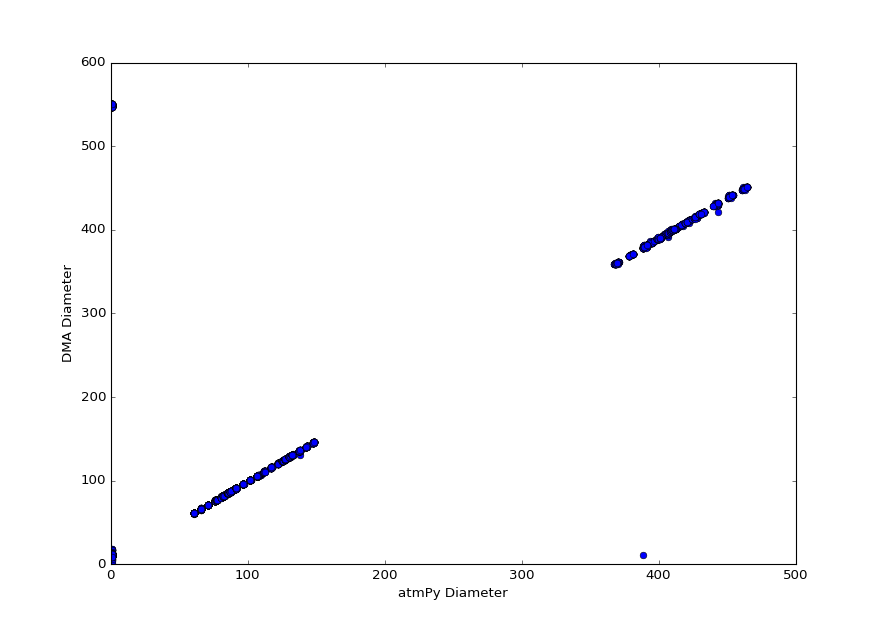

In [6]:
fig = plot.figure()
plot.plot(d,data.DMA_Diam, 'o')

# Just looking at the data - the yaxis is the data given by the DMA DAQ
# software and the x-axis is given by the Python software using the above 
# corrections
plot.xlabel('atmPy Diameter')
plot.ylabel('DMA Diameter')

In [7]:
# Load Aga's calculations of diameter for comparison
# For whatever reason, these are loaded as strings so 
# we will have to convert that....
ad = pd.read_csv('DMA_diam_nm_VQadj.txt')

# Take the difference of my calculations with Aga's
md = ad.DMA_diam_nm_VQadj.values.astype(np.float) - np.asarray(d)

<IPython.core.display.Javascript object>


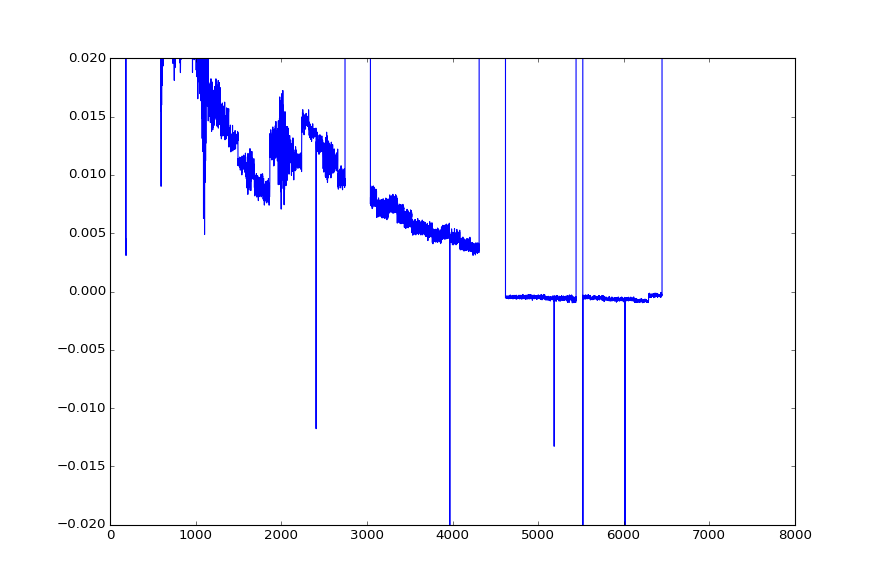

(-0.02, 0.02)

In [10]:
fig = plot.figure()

# We are going to plot the difference normalized by my calculations
# We subtract 1 to show the fractional difference between the two 
# calculations ([percent difference]/100)
plot.plot(ad.DMA_diam_nm_VQadj.values.astype(np.float)/d-1)

# plot the data between +/-2%
plot.ylim(-0.02,0.02)

# Conclusion
The above comparison indicates that the difference between the calculations we perform and those that are being performed by Aga in Igor are with 1% for most cases (the higher values are likely due to changing conditions).  